# Topics covered:
## 1. How to create tensors?
## 2. Two ways of declaring tensors
## 3. Mathematical operations
## 4. Linear algebra
## 5. Shape related operations
## 6. Automatic differentiation

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# check the current version of TensorFlow
print("Using TensorFlow version:", tf.__version__)

Using TensorFlow version: 2.5.0


### 1. Tensors of different ranks

In [3]:
"""A vector is a 1-dimensional tensor"""

# Vector in TensorFlow
vector_tf = tf.constant([0, 1, 2, 3, 4])

# Vector in Numpy
vector_np = np.array([0, 1, 2, 3, 4])

print("Shapes:", vector_tf.shape, vector_np.shape)

""" A matrix is a 2-dimensional tensor"""

# Matrix in TensorFlow
matrix_tf = tf.constant([[0, 1], [2, 3], [4, 5]])

# Matrix in Numpy
matrix_np = np.array([[0, 1], [2, 3], [4, 5]])

print("Shapes:", matrix_tf.shape, matrix_np.shape)

"""3-dimensional tensor"""

# 3-d tensor in TensorFlow
t3_tf = tf.constant([[[0., 1.], [2, 3], [4, 5]]]*5)

# 3-d matrix in Numpy
t3_np = np.array([[[0, 1], [2, 3], [4, 5]]]*5)

print("Shapes:", t3_tf.shape, t3_np.shape)

Shapes: (5,) (5,)
Shapes: (3, 2) (3, 2)
Shapes: (5, 3, 2) (5, 3, 2)


In [4]:
print(t3_tf)

tf.Tensor(
[[[0. 1.]
  [2. 3.]
  [4. 5.]]

 [[0. 1.]
  [2. 3.]
  [4. 5.]]

 [[0. 1.]
  [2. 3.]
  [4. 5.]]

 [[0. 1.]
  [2. 3.]
  [4. 5.]]

 [[0. 1.]
  [2. 3.]
  [4. 5.]]], shape=(5, 3, 2), dtype=float32)


## Question: 
Declare a tensor of shape (2,2,2,2) with random numbers from normal distribution whose mean is 1 and the standard deviation is also 1.

In [5]:
# approach 1 - initialize the nd array in Numpy and then use that to initialize the tensor
arr = np.random.randn(2,2,2,2) # returns random numbers from standard normal distribution - mean = 0, std = 1
print(arr.shape)
print(arr)

arr = arr + 1 # adding 1 makes the random numbers from normal distribution which has mean = 1

# to change the standard deviation as well multiply with the new standard deviation, std = 2.5
# arr = 2.5 * arr + 1 


arr_tf = tf.constant(arr)
print(arr_tf)

print(type(arr_tf.numpy()))

(2, 2, 2, 2)
[[[[ 0.59208137  0.17848317]
   [-0.00833444 -1.02114513]]

  [[ 0.89396842  0.9394795 ]
   [-1.77097389 -2.45305689]]]


 [[[-0.46979266 -1.95700146]
   [-0.75118619 -0.1017465 ]]

  [[ 1.46624713 -1.42824981]
   [-0.59766506 -0.44628555]]]]
tf.Tensor(
[[[[ 1.59208137  1.17848317]
   [ 0.99166556 -0.02114513]]

  [[ 1.89396842  1.9394795 ]
   [-0.77097389 -1.45305689]]]


 [[[ 0.53020734 -0.95700146]
   [ 0.24881381  0.8982535 ]]

  [[ 2.46624713 -0.42824981]
   [ 0.40233494  0.55371445]]]], shape=(2, 2, 2, 2), dtype=float64)
<class 'numpy.ndarray'>


In [6]:
# approch 2 - using random number generating functions from TensorFlow
arr_tf = tf.random.normal((2,2,2,2), mean=1, stddev=1, name="my_tensor")
print(arr_tf.shape)
print(arr_tf.numpy())

(2, 2, 2, 2)
[[[[ 1.3999135  -1.4110079 ]
   [ 0.06814235  0.88065344]]

  [[ 0.70922995  0.74357194]
   [ 0.5580388   0.5631658 ]]]


 [[[-0.6944715   1.8720722 ]
   [ 0.85158575  0.65632   ]]

  [[-0.05664313  0.5950848 ]
   [ 1.4050989   1.7151444 ]]]]


### 2. Two ways of declaring tensors

In [7]:
"""Two types of tensors: tf.constant & tf.Variable"""
const_tensor = tf.constant([[1, 2, 3], [4, 5, 6]])
var_tensor = tf.Variable([[1, 2, 3], [4, 5, 6]])

In [8]:
"""Declaring tensors with specific datatypes"""
int32_tensor = tf.Variable([[1, 2, 3], [4, 5, 6]], dtype=tf.int32) # specify int32 datatype
float32_tensor = tf.Variable([[1, 2, 3], [4, 5, 6]], dtype=tf.float32) # specify float32 datatype
bool_tensor = tf.Variable([True, False, False], dtype=tf.bool) # specify bool datatype.

print("Int32 tensor:", int32_tensor)
print("Float32 tensor:", float32_tensor)
print("Boolean tensor:", bool_tensor)

Int32 tensor: <tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>
Float32 tensor: <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>
Boolean tensor: <tf.Variable 'Variable:0' shape=(3,) dtype=bool, numpy=array([ True, False, False])>


In [9]:
int32_tensor.numpy()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

#### Note that tf.Variable infers the datatype if it is not specified. Hence the bool tensor could have been declared as
#### bool_tensor = tf.Variable([True, False, False])
#### and the result would have been same.

## Question: 
Sample random numbers from the standard normal distribution and change all negative numbers to zero. The minimum value in the resulting matrix has to be zero.

In [10]:
# let's create a 2d tensor of shape (5,4)

random_tensor = tf.random.normal((5,4))

bool_index = tf.less(random_tensor, 0.)

print(random_tensor, bool_index)

zeros_tensor = tf.zeros((5,4), dtype=tf.float32)

print(zeros_tensor)

output_tensor = tf.where(bool_index, zeros_tensor, random_tensor)

print(output_tensor)

tf.Tensor(
[[-0.9780385  -0.24049708  0.4727161  -0.07422414]
 [-0.88984656 -1.8122746   0.22336154  2.048795  ]
 [-0.7222003   0.94579077  1.4778256   0.91212827]
 [-0.48425296 -1.2321981   0.15606642 -0.4130552 ]
 [-0.90006876 -1.1009411  -0.5351326   1.1051592 ]], shape=(5, 4), dtype=float32) tf.Tensor(
[[ True  True False  True]
 [ True  True False False]
 [ True False False False]
 [ True  True False  True]
 [ True  True  True False]], shape=(5, 4), dtype=bool)
tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(5, 4), dtype=float32)
tf.Tensor(
[[0.         0.         0.4727161  0.        ]
 [0.         0.         0.22336154 2.048795  ]
 [0.         0.94579077 1.4778256  0.91212827]
 [0.         0.         0.15606642 0.        ]
 [0.         0.         0.         1.1051592 ]], shape=(5, 4), dtype=float32)


### 3. Common mathematical operations on tensors

In [11]:
"""Let us define two tensors"""

x = tf.Variable([list(range(5))]*5) # 2D tensor of shape (5, 5)
y = tf.Variable([list(range(5, 10))]*5) # 2D tensor of shape (5, 5)

print("x:", x)
print("y:", y)

x: <tf.Variable 'Variable:0' shape=(5, 5) dtype=int32, numpy=
array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]], dtype=int32)>
y: <tf.Variable 'Variable:0' shape=(5, 5) dtype=int32, numpy=
array([[5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9]], dtype=int32)>


In [12]:
"""Simple mathematical operations two tensors"""
z = x + y # element-wise addition
print("z:", z)

w = x * y # element-wise multiplications
print("w:", w)

v = y / x # element-wise division does not raise exception for division by 0 as TensorFlow supports Inf and NaN types
print("v:", v)

z: tf.Tensor(
[[ 5  7  9 11 13]
 [ 5  7  9 11 13]
 [ 5  7  9 11 13]
 [ 5  7  9 11 13]
 [ 5  7  9 11 13]], shape=(5, 5), dtype=int32)
w: tf.Tensor(
[[ 0  6 14 24 36]
 [ 0  6 14 24 36]
 [ 0  6 14 24 36]
 [ 0  6 14 24 36]
 [ 0  6 14 24 36]], shape=(5, 5), dtype=int32)
v: tf.Tensor(
[[       inf 6.         3.5        2.66666667 2.25      ]
 [       inf 6.         3.5        2.66666667 2.25      ]
 [       inf 6.         3.5        2.66666667 2.25      ]
 [       inf 6.         3.5        2.66666667 2.25      ]
 [       inf 6.         3.5        2.66666667 2.25      ]], shape=(5, 5), dtype=float64)


#### Alternatively, use TensorFlow functions for the mathematical operations
#### z = tf.add(x, y)
#### w = tf.multiply(x, y)
#### v = tf.divide(y, x)

#### Note that element-wise operations does not work if tensors have different shapes or cannot be broadcasted

In [13]:
# transpose of tensors
y = tf.Variable([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13, 14]]) # shape is (5, 3)
z = tf.transpose(y) # shape is (3, 5)
print("Before transpose:", y)
print("After transpose:", z)

Before transpose: <tf.Variable 'Variable:0' shape=(5, 3) dtype=int32, numpy=
array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]], dtype=int32)>
After transpose: tf.Tensor(
[[ 0  3  6  9 12]
 [ 1  4  7 10 13]
 [ 2  5  8 11 14]], shape=(3, 5), dtype=int32)


In [14]:
y + z

InvalidArgumentError: ignored

## Question: 
OR two boolean tensors of shape 3 by 3. 

[Link to the library](https://www.tensorflow.org/api_docs/python/tf/math/logical_or)

In [ ]:
x = tf.random.uniform((4,4), minval=0, maxval=1)
print("Numeric value of x:", x)
x = x < 0.25
print(x)

# x = tf.Variable([[True, False, True, False], [True, False, True, False], [True, False, True, False], [True, False, True, False]])
# print(x)

y = tf.random.uniform((4,4), minval=0, maxval=1)
print(y)
y = y > 0.05
print(y)

# z = x AND y
z = tf.logical_and(x, y)
print(z)

## Question: 
Find the dot product of two vectors. You can initialize the vectors using random numbers sampled from a distrbution of your choice.

In [15]:
# x = (x1, x2, x3, x4)
# y = (y1, y2, y3, y4)

# z = x (dot) y = x1*y1 + x2*y2 + x3*y3 + x4*y4

x = tf.random.uniform((10, ))
y = tf.random.uniform((10, ))

# dot product
xy = x * y
print("Shape of xy after element-wise multiplication:", xy.shape)
xy = tf.reduce_sum(xy, keepdims=True)
print("Shape of xy after reduce_sum:", xy.shape)
print(xy)

Shape of xy after element-wise multiplication: (10,)
Shape of xy after reduce_sum: (1,)
tf.Tensor([2.9930434], shape=(1,), dtype=float32)


###     
### 4. Linear algebra on tensors

In [16]:
# Matrix multiplication
x = tf.Variable([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24]])
y = tf.Variable([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13, 14]])

z = tf.linalg.matmul(x, y) # matrix multiplication between a (5, 5) and a (5, 3) tensor
print("z:", z)

z: tf.Tensor(
[[ 90 100 110]
 [240 275 310]
 [390 450 510]
 [540 625 710]
 [690 800 910]], shape=(5, 3), dtype=int32)


#### Note that tf.linalg.matmul raises exception if tensor shapes are incompatible for matrix multiplication

In [17]:
# Matrix inverse
try:
    x = tf.Variable([[2, 3], [2, 2]])
    xinv = tf.linalg.inv(x)            # x * xinv = I
    print("Inverse of x:", xinv)
except Exception as e:
    print("Exception raised while performing tensor inverse:\n", str(e))

Exception raised while performing tensor inverse:
 Value for attr 'T' of int32 is not in the list of allowed values: double, float, half, complex64, complex128
	; NodeDef: {{node MatrixInverse}}; Op<name=MatrixInverse; signature=input:T -> output:T; attr=adjoint:bool,default=false; attr=T:type,allowed=[DT_DOUBLE, DT_FLOAT, DT_HALF, DT_COMPLEX64, DT_COMPLEX128]> [Op:MatrixInverse]


#### The above exception occured because matrix inverse is allowed only for float datatypes (float16, float 32 etc.). The try-except block 
#### is purposefully used to demonstrate this behaviour.

In [18]:
# Let us try after changing the datatype using tf.cast function
x = tf.cast(x, tf.float32)
xinv = tf.linalg.inv(x)
print("Inverse of x:", xinv)

Inverse of x: tf.Tensor(
[[-1.   1.5]
 [ 1.  -1. ]], shape=(2, 2), dtype=float32)


#### Note that if the matrix is not invertible tf.linalg.inv will raise an exception

In [19]:
# Eigen value decomposition
x = tf.Variable([[3, 2, 4], [2, 0, 2], [4, 2, 3]], dtype=tf.float32) # raises exception if datatype is not floatX
eigen_values, eigen_vectors = tf.linalg.eigh(x)
print("Eigen values:", eigen_values)
print("Eigen vectors:", eigen_vectors)

Eigen values: tf.Tensor([-1.0000001  -0.99999976  8.        ], shape=(3,), dtype=float32)
Eigen vectors: tf.Tensor(
[[-0.745356    0.          0.6666667 ]
 [ 0.29814237 -0.8944272   0.3333333 ]
 [ 0.5962848   0.4472136   0.6666667 ]], shape=(3, 3), dtype=float32)


## Question: 
Solve the following system of linear equations using tensorflow. 

x + y + z + w = 13

2x + 3y − w = −1

−3x + 4y + z + 2w = 10

x + 2y − z + w = 1

Ans: x=2,y=0,z=6,w=5



In [20]:
coeff = tf.Variable([[1, 1, 1, 1], [2, 3, 0, -1], [-3, 4, 1, 2], [1, 2, -1, 1]], dtype=tf.float32) # W
print("Coeff:", coeff)

y = tf.Variable([[13], [-1], [10], [1]], dtype=tf.float32)
print("y:", y)

# x = inverse of coeff X y

inv_coeff = tf.linalg.inv(coeff)

print("Inverve of coeff:", inv_coeff)

x_solution = tf.matmul(inv_coeff, y)

print(x_solution)

Coeff: <tf.Variable 'Variable:0' shape=(4, 4) dtype=float32, numpy=
array([[ 1.,  1.,  1.,  1.],
       [ 2.,  3.,  0., -1.],
       [-3.,  4.,  1.,  2.],
       [ 1.,  2., -1.,  1.]], dtype=float32)>
y: <tf.Variable 'Variable:0' shape=(4, 1) dtype=float32, numpy=
array([[13.],
       [-1.],
       [10.],
       [ 1.]], dtype=float32)>
Inverve of coeff: tf.Tensor(
[[ 2.77777791e-01  5.55555224e-02 -1.66666672e-01  1.11111104e-01]
 [-7.40740746e-02  1.85185164e-01  1.11111112e-01  3.70370336e-02]
 [ 4.62962985e-01  9.25926045e-02  5.55555634e-02 -4.81481493e-01]
 [ 3.33333313e-01 -3.33333343e-01 -9.78801751e-09  3.33333343e-01]], shape=(4, 4), dtype=float32)
tf.Tensor(
[[ 2.0000000e+00]
 [-2.6077032e-08]
 [ 6.0000005e+00]
 [ 5.0000000e+00]], shape=(4, 1), dtype=float32)


### 5. Reshaping and Broadcasting

#### 5.1. Reshaping

In [21]:
# Reshaping changes the dimensions or axes and assigns the cell values in proper locations in the new tensor
x = tf.Variable([[-3, 2, 4], [2, 0, -2], [5, 2, 3]], dtype=tf.float32)
print("Initial tensor:", x)
x_reshaped = tf.reshape(x, shape=(9, 1)) # a (3, 3) tensor can be reshaped to (9, 1) amd (1, 9) tensors only
print("Reshaped tensor:", x_reshaped)

Initial tensor: <tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[-3.,  2.,  4.],
       [ 2.,  0., -2.],
       [ 5.,  2.,  3.]], dtype=float32)>
Reshaped tensor: tf.Tensor(
[[-3.]
 [ 2.]
 [ 4.]
 [ 2.]
 [ 0.]
 [-2.]
 [ 5.]
 [ 2.]
 [ 3.]], shape=(9, 1), dtype=float32)


In [22]:
# tf.reshape raises exception if the new shape is incompatible
try:
    x_reshape = tf.reshape(x, shape=(3, 4))
except Exception as e:
    print("Exception raised while reshaping:\n", str(e))

Exception raised while reshaping:
 Input to reshape is a tensor with 9 values, but the requested shape has 12 [Op:Reshape]


#### 5.2. Broadcasting

##### Mathematical operations on tensors requires shape compatibility otherwise exception is raised. However, broadcasting can resolve shape incompatibilities in few situations. Let us see an example.

In [23]:
x = tf.Variable([[3, 2, 4], [2, 0, 2], [4, 2, 3]], dtype=tf.float32)
k = tf.Variable([2.1])

print("Shape of x:", x.shape)
print("Shape of k:", k.shape)

# element-wise multiplication by broadcasting which repeats the only element in k along both the axes
# to resolve the shape imcompatibility
y = x * k
print("Shape of y:", y)

Shape of x: (3, 3)
Shape of k: (1,)
Shape of y: tf.Tensor(
[[6.2999997 4.2       8.4      ]
 [4.2       0.        4.2      ]
 [8.4       4.2       6.2999997]], shape=(3, 3), dtype=float32)


In [24]:
# Let us see another example
k = tf.Variable([2.1, 3.0, -1.4])

# in this case broadcasting repeats [2.1, 3.0, -1.4] three times along the row to make the shapes compatible
y = x * k
print("y:", y)

y: tf.Tensor(
[[ 6.2999997  6.        -5.6      ]
 [ 4.2        0.        -2.8      ]
 [ 8.4        6.        -4.2      ]], shape=(3, 3), dtype=float32)


In [25]:
# Broadcasting of rank 2 tensor for multiplying with rank 3 tensor

# Rank 2 tensor to be broadcasted
k = tf.Variable([[2.1, 3.0, -1.4], [1.1, 3.2, -1.1], [0.67, 2.1, -0.03]])

# Rank 3 tensor
x = tf.Variable([[[3, 2, 4],
                  [2, 0, 2],
                  [4, 2, 3]],
                 [[0, -2, 1],
                  [4, 0, 2],
                  [6, -2, 3]]
                 ], dtype=tf.float32)

# Here shape of x is (2, 3, 3) and that of k is (3, 3). Hence broadcasting will add a new axes and repeat k along it.
y = x * k
print("y:", y)

y: tf.Tensor(
[[[ 6.2999997  6.        -5.6      ]
  [ 2.2        0.        -2.2      ]
  [ 2.68       4.2       -0.09     ]]

 [[ 0.        -6.        -1.4      ]
  [ 4.4        0.        -2.2      ]
  [ 4.02      -4.2       -0.09     ]]], shape=(2, 3, 3), dtype=float32)


In [26]:
# Alternatively, we can add the new dimension before multiplying
print("Old shape:", k.shape)
k = tf.expand_dims(k, axis=0) # insert a new axis along the first dimension to create a rank 3 tensor # (3,3,1)
print("New shape:", k.shape)

y = x * k
print("y:", y)

Old shape: (3, 3)
New shape: (1, 3, 3)
y: tf.Tensor(
[[[ 6.2999997  6.        -5.6      ]
  [ 2.2        0.        -2.2      ]
  [ 2.68       4.2       -0.09     ]]

 [[ 0.        -6.        -1.4      ]
  [ 4.4        0.        -2.2      ]
  [ 4.02      -4.2       -0.09     ]]], shape=(2, 3, 3), dtype=float32)


## Question: 
Convert the tensor 'p' given in the cell below into a cube tensor of rank three. 

In [27]:
p = tf.Variable(np.random.randn(1,27))

print("Before reshaping:", p)

reshaped_p = tf.reshape(p, (3,3,3))

print("After reshaping:", reshaped_p)

Before reshaping: <tf.Variable 'Variable:0' shape=(1, 27) dtype=float64, numpy=
array([[-0.84526715, -0.98071905, -0.31546252,  1.00356548, -1.1940714 ,
         0.39275259, -0.23323048, -1.93020462, -0.07216607,  0.17965442,
         0.23397519, -0.31100969, -1.81292206, -0.83108904, -0.63600832,
         0.72207968, -0.12898067, -0.28640937, -0.34396474, -0.66130344,
        -0.08743754, -0.37454943,  0.51520261, -1.44959395, -1.53930831,
         1.18989605, -1.57662734]])>
After reshaping: tf.Tensor(
[[[-0.84526715 -0.98071905 -0.31546252]
  [ 1.00356548 -1.1940714   0.39275259]
  [-0.23323048 -1.93020462 -0.07216607]]

 [[ 0.17965442  0.23397519 -0.31100969]
  [-1.81292206 -0.83108904 -0.63600832]
  [ 0.72207968 -0.12898067 -0.28640937]]

 [[-0.34396474 -0.66130344 -0.08743754]
  [-0.37454943  0.51520261 -1.44959395]
  [-1.53930831  1.18989605 -1.57662734]]], shape=(3, 3, 3), dtype=float64)


In [28]:
reshaped_p[:, :, 0]

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[-0.84526715,  1.00356548, -0.23323048],
       [ 0.17965442, -1.81292206,  0.72207968],
       [-0.34396474, -0.37454943, -1.53930831]])>

### 6. Automatic Differentiation

#### Gradients or partial derivatives are useful for training linear models and neural networks using gradient-based optimization
#### TensorFlow's tf.GradientTape records computations and computes gradients in reverse-mode differentiation.
#### Let us see how it works.

####  
#### 6.1 How to use tf.GradientTape?

In [29]:
# declare tensor for with respect to which gradient is required
x = tf.Variable(3.0)

# using tf.GradientTape context to perform computations and record them in tape
with tf.GradientTape() as tape:
    y = 3.0 * tf.math.log(x)  # y = 3logx

# compute gradients
dy_dx = tape.gradient(y, x) # for y = log(x), dy/dx = 3/x
print("Gradient dy_dx:", dy_dx) # alternately doing dy_dx.numpy() returns the result as a numpy array which in this case is a single value

Gradient dy_dx: tf.Tensor(1.0, shape=(), dtype=float32)


In [30]:
# for multi-variate functions, gradients are partial derivatives
x = tf.Variable(3.0)
y = tf.Variable(4.0)

with tf.GradientTape() as tape:
    r = x**2 + y**2

dr_dx, dr_dy = tape.gradient(r, [x, y]) # the first argument is the target function and the second one is a list of variables
print("dr_dx:", dr_dx.numpy()) # ∂r/∂x = 2x
print("dr_dy:", dr_dy.numpy()) # ∂r/∂y = 2y

dr_dx: 6.0
dr_dy: 8.0


In [31]:
# tf.GradientTape supports the Chain Rule of Differentiation as well
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x ** 2 # y is a function of x
    z = 3*tf.math.log(tf.math.sqrt(y))
    r = z ** 2 # r is a function of y

dr_dx = tape.gradient(r, x) # Chain rule is applied to compute dr_dx as r is a function of x through y
print("dr_dx:", dr_dx.numpy()) # dr/dx = dr/dy × dy/dx = 2y × 2x = 2(x²) × 2x = 4x³

dr_dx: 6.591674


#### Note that the intermediate variable 'y' is released outside the context of tf.GradientTape. To compute gradient dr/dy, tf.GradientTape 
#### needs to be persistent

In [32]:
# Persistent tf.GradientTape
x = tf.Variable(3.0)

with tf.GradientTape(persistent=True) as tape:
    y = x ** 2
    r = y ** 2

dr_dx = tape.gradient(r, x)
dr_dy = tape.gradient(r, y)

print("dr_dx:", dr_dx.numpy())
print("dr_dy:", dr_dy.numpy())

dr_dx: 108.0
dr_dy: 18.0


####  
#### 6.2 How to use tf.GradientTape for model training?

In [33]:
# Let us see this in action in the context of Logistic Regression

# Points to note:
# 1. For logistic regression, the probabilty P(y=1|X) = 1/[1+exp{-(WX+b)}]; where W & b are weights and bias of the model
# 2. The loss function is L = -ylog[P(y=1|X)] - (1-y)log[1-P(y=1|X)] otherwise known as binary log loss.
# 3. For training the model using Stochastic Gradient Descent, we need to compute ∂L/∂W and ∂L/∂b. 

# Let us see how we can compute the gradients using tf.GradientTape

In [34]:
# declare weights and bias of the model
num_features = 10 # the model has 10 features
W = tf.Variable(tf.random.normal(shape=(10, ))) # wrapping the random numbers with tf.Variable to enable gradients on W
b = tf.Variable(tf.random.normal(shape=(1, )))  # wrapping the random numbers with tf.Variable to enable gradients on b

# let us initialize a training samples
num_samples = 100

# generate training samples randomly and wrap them up in tf.constant to disable gradient computation on samples
X = tf.constant(tf.random.uniform(shape=(100, 10)))
y = tf.constant(tf.cast(tf.greater(tf.random.uniform(shape=(100,)), 0.80), dtype=tf.float32)) # target must be 0 and 1

In [35]:
# compute gradients
with tf.GradientTape() as tape:
    log_odds = tf.reduce_sum(W * X, axis=1) + b
    # tf.reduce_sum(W * X, axis=1) results in a (1, ) vector to which b is added
    
    probas = tf.sigmoid(log_odds) # using sigmoid function available in TensorFlow
    
    loss = tf.reduce_mean(-y*tf.math.log(probas) -(1.-y)*tf.math.log(1.-probas))

[dloss_dW, dloss_db]  = tape.gradient(loss, [W, b])

print("dloss_dW:", dloss_dW.numpy())
print("dloss_db:", dloss_db.numpy())

dloss_dW: [0.04598666 0.0153583  0.04931645 0.02773663 0.02965606 0.02301822
 0.01377665 0.04606053 0.06599537 0.03965475]
dloss_db: [0.07909795]


####  
#### 6.3 How to disable gradient computation for selected variables?

In [36]:
# let us use an earlier example to show how to disable gradient computation
# for multi-variate functions, gradients are partial derivatives
x = tf.Variable(3.0, trainable=True)  # by default, trainable=True so we did npt mention it earlier 
y = tf.Variable(4.0, trainable=False) # trainable=False signals tf.GradientTape to stop tracking the variable

with tf.GradientTape() as tape:
    r = x**2 + y**2

try:
    dr_dx, dr_dy = tape.gradient(r, [x, y])
    print("dr_dx:", dr_dx.numpy())
    print("dr_dy:", dr_dy.numpy()) # dr_dy is None hence this line would raise an exception
except Exception as e:
    print("Error occurred during gradient computation:\n", str(e))

dr_dx: 6.0
Error occurred during gradient computation:
 'NoneType' object has no attribute 'numpy'


## Question: 
Find the minima of the function y=x^2 - 4 

In [37]:
# Finding the minima of the above function using Gradient Descent
# Step 0: initialize x (with a random number)
# Step 1: Run a loop till the stopping criteria is met (stopping criteria: number of iterations, tolerance or minimum threshold on reduction in the value of y compared to the last iteration)
# Step 1.1: Compute dy/dx
# Step 1.2: Update x : x - lr * (dy/dx)
# Step 1.3: Calculating y after updating x
# Step 1.4: Check if (y-y_previous)*100/y_previous < tolerance

In [38]:
# define hyper parameters of the Gradient Descent algorithm
lr = tf.constant(0.1)
tolerance = 0.01

In [39]:
# initialize x
x = tf.Variable(tf.random.normal((1,)))
print("Initial value of x:", x)

Initial value of x: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.82620114], dtype=float32)>


In [40]:
# initial value of y
yprev = x ** 2 - 4.
print("Initial value of y using initial value of x:", yprev)

Initial value of y using initial value of x: tf.Tensor([-3.3173916], shape=(1,), dtype=float32)


In [41]:
import time

In [42]:
num_iters = []
x_values = []
y_values = []

# loop of Gradient Descent
i = 0
while True:
  i += 1
  num_iters.append(i)
  print("x, yprev:", x.numpy()[0], yprev.numpy()[0])

  with tf.GradientTape() as tape:
    y = x ** 2 - 4.
  
  dy_dx = tape.gradient(y, x)
  x.assign(x - lr * dy_dx) # x = x - lr * dy_dx output of this is tf.Tensor which can't be used by GradientTape

  ynew = x ** 2 - 4.

  print("x, ynew:", x.numpy()[0], ynew.numpy()[0])

  x_values.append(x.numpy()[0])
  y_values.append(y.numpy()[0])

  delta = tf.abs((ynew-yprev)*100./yprev).numpy()[0]

  print("delta:", delta)
  
  if delta <= tolerance:
    print("Exiting loop")
    break
  else:
    yprev = ynew
    time.sleep(1)

x, yprev: -0.82620114 -3.3173916
x, ynew: -0.6609609 -3.5631306
delta: 7.4075966
x, yprev: -0.6609609 -3.5631306
x, ynew: -0.5287687 -3.7204037
delta: 4.413901
x, yprev: -0.5287687 -3.7204037
x, ynew: -0.42301497 -3.8210583
delta: 2.7054753
x, yprev: -0.42301497 -3.8210583
x, ynew: -0.338412 -3.8854773
delta: 1.685895
x, yprev: -0.338412 -3.8854773
x, ynew: -0.2707296 -3.9267054
delta: 1.0610808
x, yprev: -0.2707296 -3.9267054
x, ynew: -0.21658368 -3.9530916
delta: 0.6719695
x, yprev: -0.21658368 -3.9530916
x, ynew: -0.17326695 -3.9699786
delta: 0.42718336
x, yprev: -0.17326695 -3.9699786
x, ynew: -0.13861355 -3.9807863
delta: 0.27223706
x, yprev: -0.13861355 -3.9807863
x, ynew: -0.11089084 -3.9877033
delta: 0.17375964
x, yprev: -0.11089084 -3.9877033
x, ynew: -0.08871268 -3.99213
delta: 0.1110092
x, yprev: -0.08871268 -3.99213
x, ynew: -0.07097014 -3.9949632
delta: 0.07096783
x, yprev: -0.07097014 -3.9949632
x, ynew: -0.056776114 -3.9967766
delta: 0.04539245
x, yprev: -0.056776114 -3.

In [43]:
from matplotlib import pyplot as plt

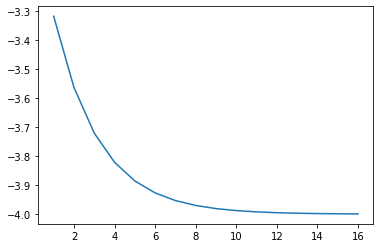

In [44]:
plt.plot(num_iters, y_values)

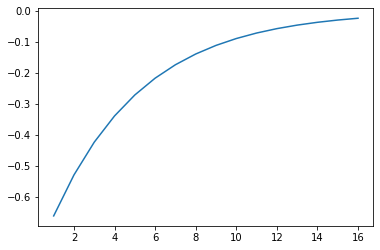

In [45]:
plt.plot(num_iters, x_values)